## Casein Fluorescent Walkthrough

this is a walkthrough of using the model to analyze a fluorescent video of beads diffusing in a casein solution that is freezing in time

# Import modules

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import numpy as np
import xarray as xr
import torch
import yaml
import pickle

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import axes as ax

import sys
sys.path.append("C:\\Users\\svc-scst291lab\\Downloads\\PyDDM-main\\PyDDM-main\\PyDDM")
import ddm_analysis_and_fitting as ddm

import utils_cnn

from utils_cnn import setup_nn, set_seed, one_time_cost, CorrDataSet #, CorrDataSet_noshuffle
from train_and_test import train_autoencoder
from torch.utils.data import DataLoader

import os
from os import path
import pathlib
from pathlib import Path

import UsingNetwork

# Loading Model

In [2]:
with open("C:\\Users\\svc-scst291lab\\Documents\\GitHub\\Testing-CNN\\CNN Classes\\js_test 7_10 NA_CS_7k-8k_12k-13k_mod_9\\trainer_mod_number_9.pkl", "rb") as f:
    trainer = pickle.load(f)
    
#put the yml location of the files that you wanted to test through the model
trainer.yml_location = "C:\\Users\\svc-scst291lab\\Documents\\GitHub\\Testing-CNN\\CNN Classes\\js_test 7_10 NA_CS_7k-8k_12k-13k_mod_9\\yml_files_fluorescent_substack\\"
implementer = UsingNetwork.TestModel(trainer.yml_location)
implementer.recover_ddm_metadata()

In [3]:
trainer.final_location

'C:\\Users\\svc-scst291lab\\Documents\\GitHub\\Testing-CNN\\CNN Classes\\Training lr_0.001_latent_space_16_batchsize_2_cv_10_10_k_1_1_wd_0\\training_output\\autoencoder2d_best_lr_0.001_latent_space_16_batchsize_2_cv_10_10_k_1_1_wd_0_mod_number_9'

In [4]:
trainer.final_location = 'C:\\Users\\svc-scst291lab\\Documents\\GitHub\\Testing-CNN\\CNN Classes\\js_test 7_10 NA_CS_7k-8k_12k-13k_mod_9\\training_output\\autoencoder2d_best_lr_0.001_latent_space_16_batchsize_2_cv_10_10_k_1_1_wd_0_mod_number_9'

In [5]:
implementer.use_model(trainer.final_location)

fluorescent_substack_validation.torch
C:\Users\svc-scst291lab\Documents\GitHub\Testing-CNN\CNN Classes\js_test 7_10 NA_CS_7k-8k_12k-13k_mod_9\torch_data\validation\fluorescent_substack_output.torch


# diffusion coeffieicient as function of frames

In [ ]:
file_list = ['fluorescent_substack.yml']
implementer.get_diffusion(q_range = [21,30], files = file_list)

# displaying diffusion coefficient

In [12]:
diff_coeff_full = [0.03836, 0.042,0.03121,0.02953,0.03054,0.03017,0.0291,0.02921,0.02449,0.02923,0.02565,0.02215,0.02682,0.02117,0.02058,0.02397,0.02222,0.0234,0.02172,0.01779]

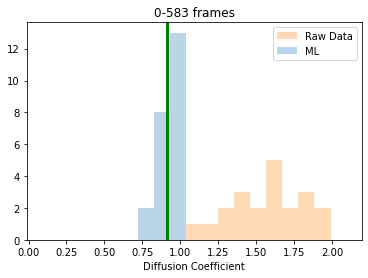

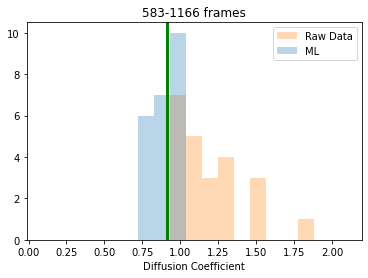

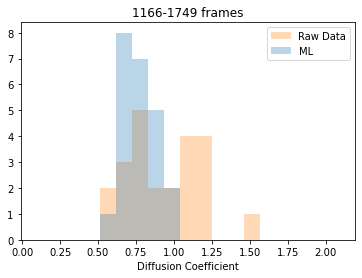

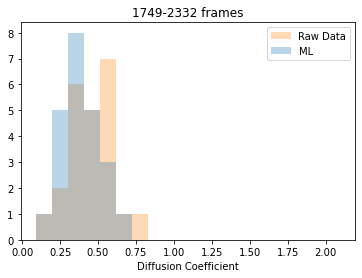

In [103]:
yml_file = '1-20000-6_substack.yml'




numBins = 20
minVal = 0.09
maxVal = 2.2
binTest = np.arange(minVal ,maxVal, (maxVal- minVal)/numBins)

plt.figure()

plt.hist(implementer.diff_coeffs_dict[yml_file]['data'][:i,0],color='tab:orange', alpha=0.3, bins=binTest, label='Raw Data')
plt.hist(implementer.diff_coeffs_dict[yml_file]['output'][:i,0], color='tab:blue', alpha=0.3, bins=binTest, label='ML')
plt.axvline(0.152*6, linewidth = 3, color='g')


plt.xlabel("Diffusion Coefficient")
plt.title("0-583 frames")
plt.legend()

########################################
plt.figure()

plt.hist(implementer.diff_coeffs_dict[yml_file]['data'][i:2*i,0],color='tab:orange', alpha=0.3, bins=binTest, label='Raw Data')
plt.hist(implementer.diff_coeffs_dict[yml_file]['output'][i:2*i,0], color='tab:blue', alpha=0.3, bins=binTest, label='ML')
plt.axvline(0.152*6, linewidth = 3, color='g')

plt.xlabel("Diffusion Coefficient")
plt.title("583-1166 frames")
plt.legend()

##########################################
plt.figure()

plt.hist(implementer.diff_coeffs_dict[yml_file]['data'][2*i:3*i,0],color='tab:orange', alpha=0.3, bins=binTest, label='Raw Data')
plt.hist(implementer.diff_coeffs_dict[yml_file]['output'][2*i:3*i,0], color='tab:blue', alpha=0.3, bins=binTest, label='ML')
#plt.axvline(0.152*6, linewidth = 3, color='g')

plt.xlabel("Diffusion Coefficient")
plt.title("1166-1749 frames")
plt.legend()

###############################################
plt.figure()

plt.hist(implementer.diff_coeffs_dict[yml_file]['data'][3*i:4*i,0],color='tab:orange', alpha=0.3, bins=binTest, label='Raw Data')
plt.hist(implementer.diff_coeffs_dict[yml_file]['output'][3*i:4*i,0], color='tab:blue', alpha=0.3, bins=binTest, label='ML')
#plt.axvline(mean_target_4, linewidth = 3, color='g')

plt.xlabel("Diffusion Coefficient")
plt.title("1749-2332 frames")
plt.legend()



In [12]:
frames = np.arange(0,(5000/3)-50,25)
print("shape of frames: ", frames.shape)
#framesFull = np.arange(0,20000, 1000)

shape of frames:  (65,)


In [13]:
full = [0.264, 0.1911, 0.139, 0.01599, 0.0336]

In [14]:
full_adj = np.multiply(full, 3) 

In [15]:
full_frames= np.arange(0,5000,1000)

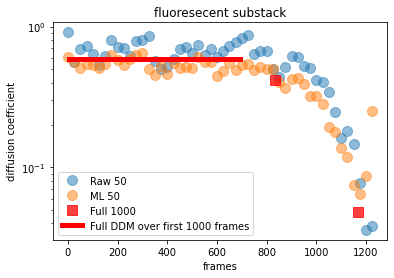

In [58]:
yml_file1 = "fluorescent_substack.yml"
plt.semilogy(frames[:50], implementer.diff_coeffs_dict[yml_file1]['data'][:50,0], 'o', color='tab:blue', ms=10, alpha=0.5,label='Raw 50')
plt.plot(frames[:50], implementer.diff_coeffs_dict[yml_file1]['output'][:50,0], 'o', color='tab:orange', ms=10, alpha=0.5,label='ML 50')
plt.plot((full_frames[2:4]+500)/3, full_adj[2:4], 'rs', ms=10, alpha=0.75,label='Full 1000')
plt.axhline(y = 0.59, linewidth = 5, xmin = 0.05, xmax = 0.56, color = 'r', label = "Full DDM over first 1000 frames")
plt.xlabel("frames")
plt.ylabel("diffusion coefficient")
plt.title("fluoresecent substack")

plt.legend(fontsize=10)

#  Test fits on set of 50 frames

In [6]:
networkOut = 'C:\\Users\\svc-scst291lab\\Documents\\GitHub\\Testing-CNN\\CNN Classes\\js_test 7_10 NA_CS_7k-8k_12k-13k_mod_9\\network_output\\'

In [12]:
param = """
DataDirectory: './'
FileName: 'null'
Metadata:
  pixel_size: .325
  frame_rate: 25
Analysis_parameters:
  number_lag_times: 40
  last_lag_time: 600
  binning: yes
  bin_size: 2
  use_windowing_function: yes
Fitting_parameters:
  model: 'ISF - Single Exponential - NonErgodic'
  Tau: [1, 0.001, 10000]
  StretchingExp: [1.0, 0.3, 1.5]
  Amplitude: [1e2, 1, 1e12]
  NonErgodic: [0.05, 0.001, 0.3]
  Background: [100, 0, 100]
  Good_q_range: [18, 30]
  Auto_update_good_q_range: False   ########################
"""
#parameters_as_dictionary = yaml.safe_load(ddm_analysis_parameters_str)

not none


,Initial guess,Minimum,Maximum
Tau,1.00,0.001,10000.0
StretchingExp,1.00,0.300,1.5
NonErgodic,0.05,0.001,0.3


File ./_ddmmatrix.nc not found.
Perhaps you meant to load one of...
	.\fluorescentframe1950.nc
By default, loading .\fluorescentframe1950.nc
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit01'.
First D = 0.8283
In function 'get_tau_vs_q_fit', using new tau...
In hf.plot_one_tau_vs_q function, using new tau... 
First D = 0.9890


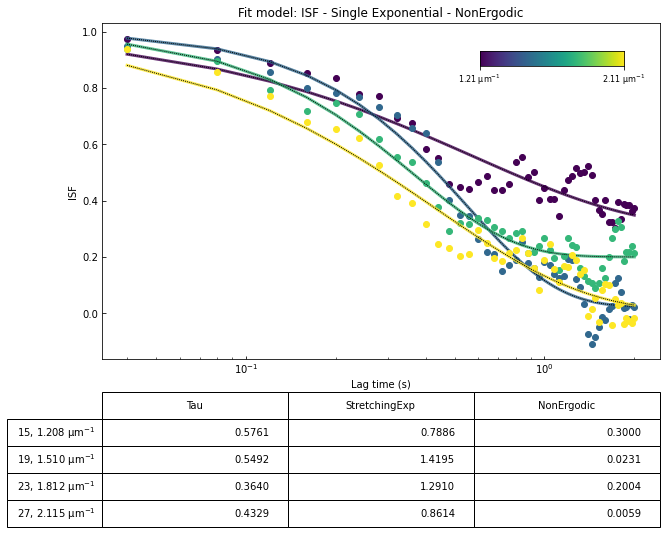

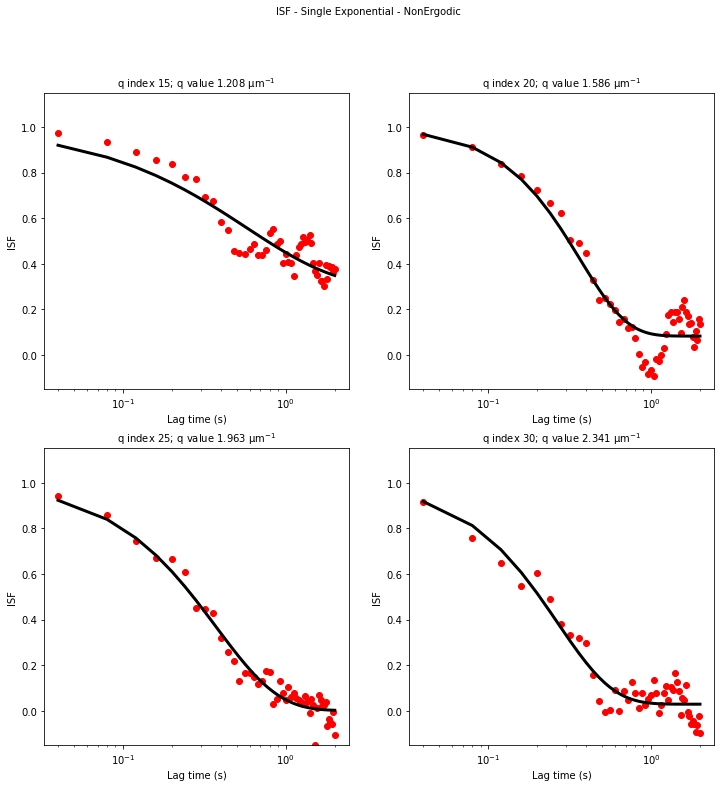

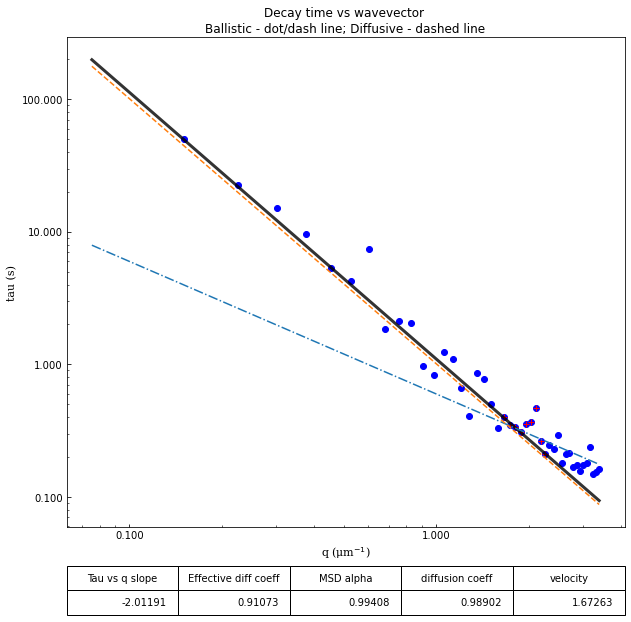

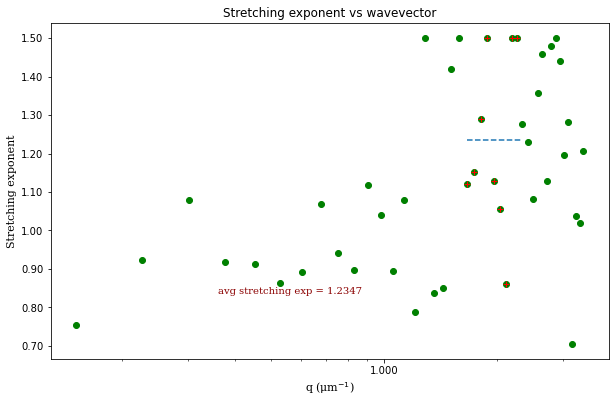

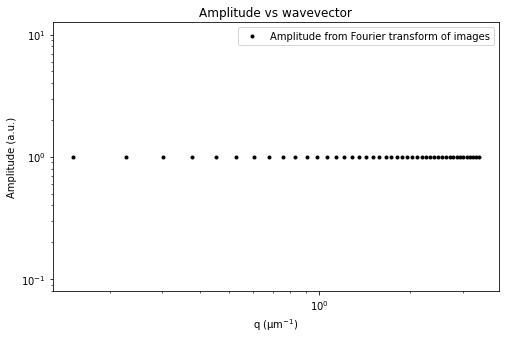

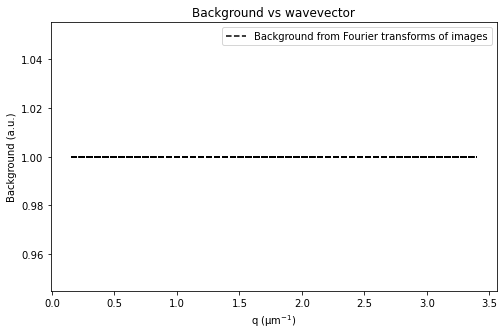

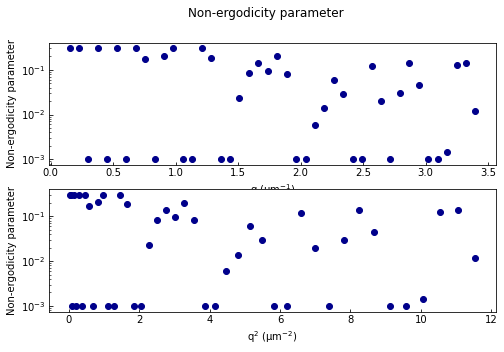

In [13]:
#the number that goes after raw is the beginning frame of the set of 50 frames that you're analyzing
fitraw01, (qmin,qmax) = implementer.fit_ddm('Z:\\JJ\\Machine Learning\\Machine Learning 2023\\ISF\\Fluorescent 1508\\fluorescent_substack_raw_175','fluorescent_substack.yml', qrange=[21,30], meta_data = param, return_fit=True)

In [ ]:
#the number that goes before modeloutput is the beginning frame of the set of 50 frames that you're analyzing

fitoutput01, (qmin, qmax) = implementer.fit_ddm(networkOut + 'fluorescent_substack_175_modeloutput','fluorescent_substack.yml', qrange=[21,30], return_fit=True)

In [ ]:
diff_raw_lst = []
diff_ml_lst = []
for i in range(25):
    fitraw01, (qmin,qmax) = implementer.fit_ddm('Z:\\JJ\\Machine Learning\\Machine Learning 2023\\ISF\\Fluorescent 1508\\fluorescent_substack_raw_' + str(i*25),'fluorescent_substack.yml', qrange=[21,30], return_fit=True)
    fitoutput01, (qmin, qmax) = implementer.fit_ddm(networkOut + 'fluorescent_substack_' + str(i*25)+'_modeloutput','fluorescent_substack.yml', qrange=[21,30], return_fit=True)
        
    diff_raw = np.array(1/(fitraw01.parameters.loc['Tau'][15:-6] * fitraw01.q[15:-6] * fitraw01.q[15:-6]))
    diff_ml = np.array(1/(fitoutput01.parameters.loc['Tau'][15:-6] * fitoutput01.q[15:-6] * fitoutput01.q[15:-6]))

    convert_raw_lst = []
    convert_ml_lst = []

    convert_raw_lst = diff_raw.tolist()
    diff_raw_lst.extend(convert_raw_lst)
    
    convert_ml_lst = diff_ml.tolist()
    diff_ml_lst.extend(convert_ml_lst)

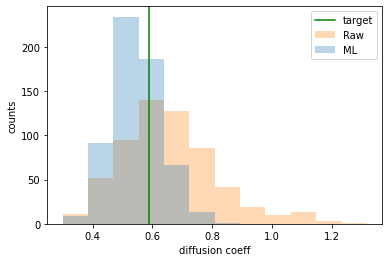

In [8]:
plt.figure()
numBins = 13
minVal = 0.30
maxVal = 1.4
bins = np.arange(minVal ,maxVal, (maxVal- minVal)/numBins)
plt.hist(diff_raw_lst, bins=bins, color = 'tab:orange', alpha=0.3, label = "Raw")
plt.hist(diff_ml_lst, bins = bins, color = 'tab:blue', alpha = 0.3, label = "ML")
plt.axvline(x = 0.59, color = 'green', label = 'target')

plt.xlabel("diffusion coeff")
plt.ylabel("counts")
plt.legend(fontsize= 10)


#plt.hist(diff_output_lst, bins=8, color='b', alpha=0.3)

# analyzing the input v output of those set of 50 frames

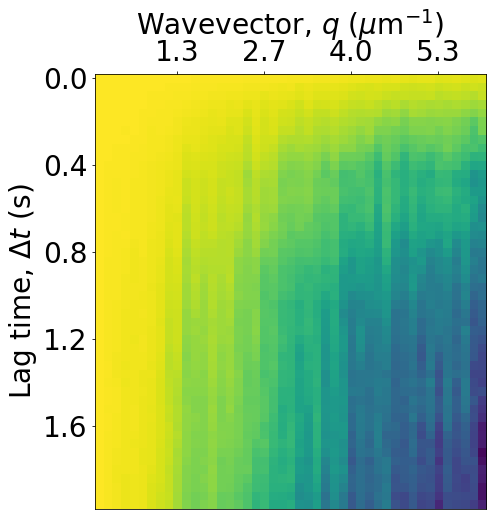

In [18]:
fig,ax = plt.subplots(figsize=(8,8))
plt.matshow(fitraw01.isf_data, fignum=0,vmin=-0.1, vmax=1.0)

#plt.colorbar()

q_indices = [9,19,29,39]
ax.set_xticks(q_indices)
q_labels = []
for qindex in q_indices:
    q_labels.append("%.1f" % fitraw01.q[qindex])
ax.set_xticklabels(q_labels)

lagtimes_frames = np.array([0,10,20,30,40])
ax.set_yticks(lagtimes_frames)
time_labels = lagtimes_frames/25.0
ax.set_yticklabels(time_labels)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xlabel("Wavevector, $q$ ($\mu$m$^{-1}$)", fontsize=28)
ax.set_ylabel("Lag time, $\Delta t$ (s)", fontsize=28)
ax.tick_params(direction='out', which='both', labelsize=28)

plt.savefig("ISFs_0.5percent_qdt_raw.png", bbox_inches ='tight', dpi=300)

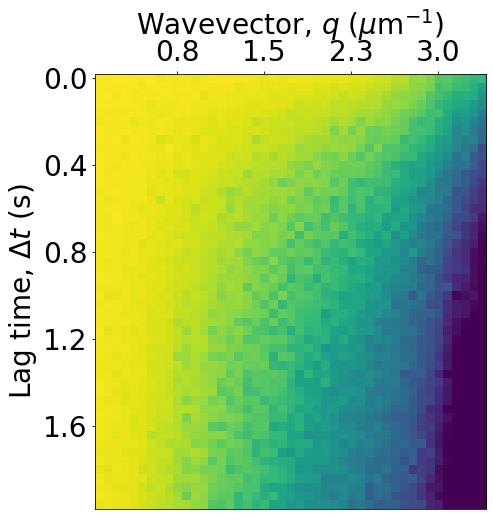

In [14]:
fig,ax = plt.subplots(figsize=(8,8))
plt.matshow(fitoutput01.isf_data, fignum=0,vmin=-0.1, vmax=1.0)

#plt.colorbar()

q_indices = [9,19,29,39]
ax.set_xticks(q_indices)
q_labels = []
for qindex in q_indices:
    q_labels.append("%.1f" % fitoutput01.q[qindex])
ax.set_xticklabels(q_labels)

lagtimes_frames = np.array([0,10,20,30,40])
ax.set_yticks(lagtimes_frames)
time_labels = lagtimes_frames/25.0
ax.set_yticklabels(time_labels)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xlabel("Wavevector, $q$ ($\mu$m$^{-1}$)", fontsize=28)
ax.set_ylabel("Lag time, $\Delta t$ (s)", fontsize=28)
ax.tick_params(direction='out', which='both', labelsize=28)

plt.savefig("ISFs_0.5percent_qdt_raw.png", bbox_inches ='tight', dpi=300)

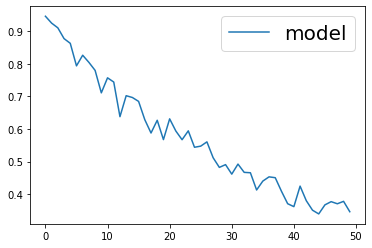

In [16]:
#looking at the isf of raw v model
#plt.plot(fitraw01.isf_data[:,30], label = "raw")
plt.plot(fitoutput01.isf_data[:,30], label = "model")
plt.legend(fontsize=20)